In [1]:
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
from husky.hamiltonian.ElectronicSystem import Junction
from husky.hamiltonian.model import tight_binding as tb



= Non Equilibrium Green Function Solver
= N. Renaud 2017

 - Energy range -5.000  5.000 500 points
 - Wide Band Limit Approximation  True
 - Compute Transmission


   : 100%|███| 500/500 [00:00<00:00, 12180.63it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


 - Transmission computed in 0.052 sec. 


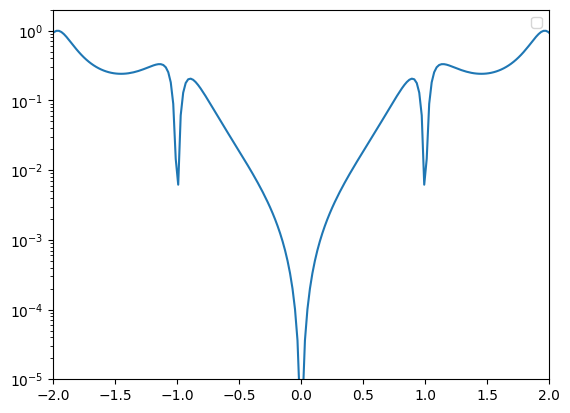

In [3]:

# define the junction
system = Junction()


# add the molecule hamiltonian
# here a cyclic aromatic with 6 centers, 
# onsite energy e =  0 eV 
# coupling      a = -1 eV

e =  0
a = -1


# benzene
h0 = np.array([[e, a, 0, 0, 0, a],
               [a, e, a, 0, 0, 0],
               [0, a, e, a, 0, 0],
               [0, 0, a, e, a, 0],
               [0, 0, 0, a, e, a],
               [a, 0, 0, 0, a, e]])

system.add_central_matrix(h0)
system.add_central_matrix(h0=tb.cyclic_aromatic(N=6,e=0,a=-1.))


# add single state electrodes
# onsite energy e0 = 0
# coupling between unit cell of the electrodes vi = -2.5
# coupling between the last site of the electorde and the molecule vmol 1
e0,vi,vmol = 0.,-2.5, 1.

# first electrode
system.add_electrode_matrix(h0 = np.array([e0]), hi = np.array([vi]),vmol = np.array([vmol,0,0,0,0,0]))

# second electrode
system.add_electrode_matrix(h0 = np.array([e0]), hi = np.array([vi]),vmol = np.array([0,0,vmol,0,0,0]))
'''



# hexadiene
h0 = np.array([[e, a, 0, 0, 0, 0],
               [a, e, a, 0, 0, 0],
               [0, a, e, a, 0, 0],
               [0, 0, a, e, a, 0],
               [0, 0, 0, a, e, a],
               [0, 0, 0, 0, a, e]])
               
system.add_central_matrix(h0)
system.add_central_matrix(h0=tb.cyclic_aromatic(N=6,e=0,a=-1.))

e0,vi,vmol = 0.,-2.5, 0.1
system.add_electrode_matrix(h0 = np.array([e0]), hi = np.array([vi]),vmol = np.array([vmol,vmol,0,0,0,0]))
system.add_electrode_matrix(h0 = np.array([e0]), hi = np.array([vi]),vmol = np.array([0,0,0,0,0,vmol]))

'''


##########################################################
#				NEGF - WBL
##########################################################
from husky.transport.negf import NEGFsolver
trans=NEGFsolver(system)
trans.set_energy_range(emin=-5,emax=5,nE=500)


# set the wbl approx on and define the ldos of the elctrodes
trans.set_wide_band_limit(True)
trans.set_local_dos_electrode(0.4)

# compute the transport properties
te_negf_wbl = trans.compute_transmission()


plt.figure()

plt.semilogy(trans.energies,te_negf_wbl)
plt.ylim([1E-5,2])
plt.xlim(-2,2)
plt.legend()
plt.show()
